**Train Data:** Train data is the data that we use to train our machine learning model. This data consists of input features and their corresponding output labels. The model learns patterns from this data and uses them to make predictions on new, unseen data.


**Validation Data:** Validation data is the data that we use to evaluate the performance of our model during training. We use this data to tune the model's hyperparameters and prevent overfitting. The validation data should be representative of the unseen data that the model will encounter in the real world.


**Test Data:**Test data is the data that we use to evaluate the final performance of our model after training and tuning. This data should be completely separate from the train and validation data to avoid any data leakage.

**1. Random Train-Test Split**



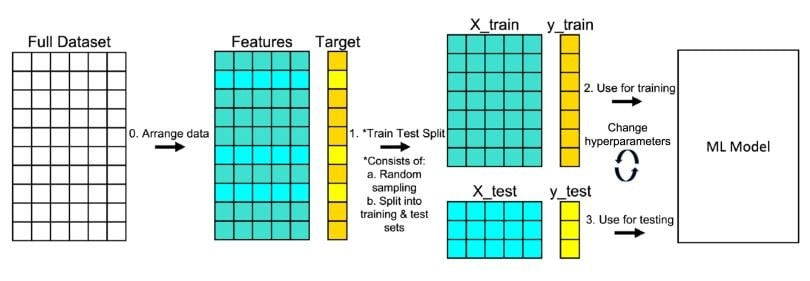

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load Iris dataset
iris = load_iris()

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Train logistic regression model on training set
clf = LogisticRegression().fit(X_train, y_train)

# Evaluate model on test set
score = clf.score(X_test, y_test)
print(f"Accuracy: {score:.2f}")

Accuracy: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **2. Stratified Sampling**

Stratified sampling is a data-splitting strategy that ensures that the proportion of each class in the training and test sets is the same as that in the original dataset. This approach is particularly useful when dealing with imbalanced datasets, where one class is significantly more prevalent than the others. Stratified sampling helps to ensure that the model is trained and evaluated on a representative sample of the data, and it can improve the model's overall performance.


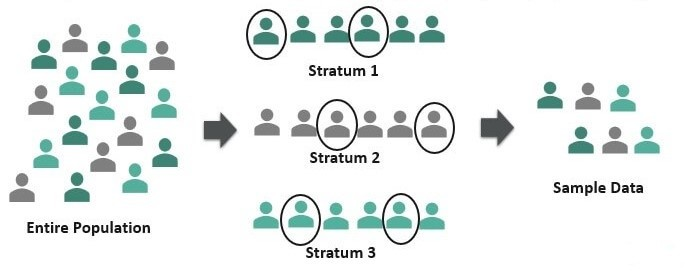

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression


# Load Iris dataset
iris = load_iris()

# Create stratified sampling object
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split dataset into training and test sets using stratified sampling
for train_index, test_index in strat_split.split(iris.data, iris.target):
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]


# Train logistic regression model on training set
clf = LogisticRegression().fit(X_train, y_train)

# Evaluate model on test set
score = clf.score(X_test, y_test)
print(f"Accuracy: {score:.2f}")

Accuracy: 0.97


# 3. Holdout Validation with Validation Set


Holdout validation with a validation set is a data-splitting strategy that involves splitting the dataset into a training set, a validation set, and a test set. We use the training set to fit the model, the validation set to tune the model's hyperparameters, and the test set to evaluate the final model. This strategy is useful when we have a large dataset and want to avoid the computational cost of cross-validation.



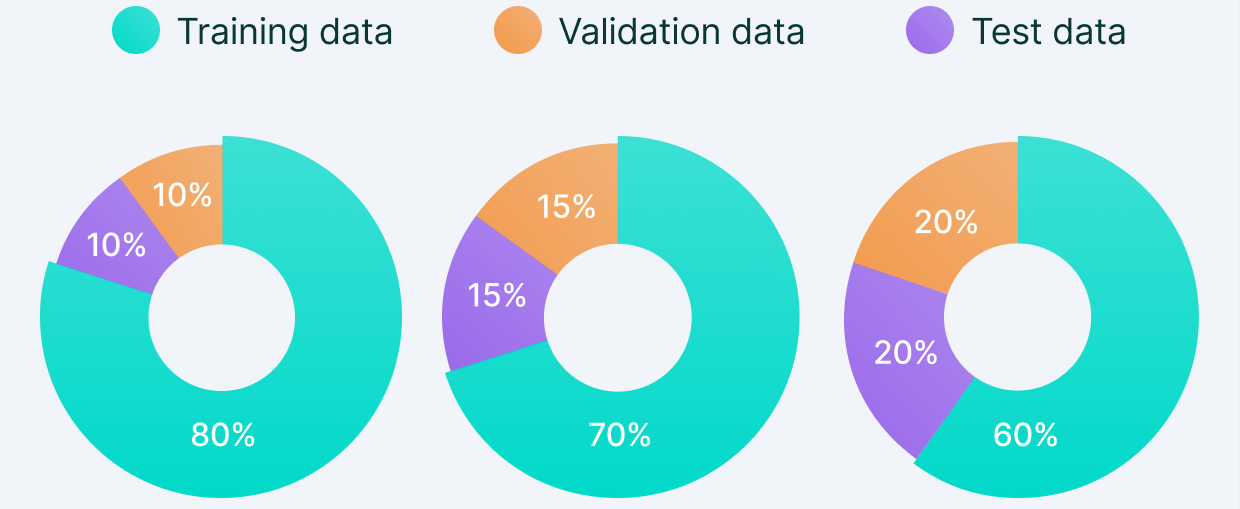

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Load Iris dataset
iris = load_iris()
# Split dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Train logistic regression model on training set
clf = LogisticRegression().fit(X_train, y_train)

# Evaluate model on validation set
score = clf.score(X_val, y_val)
print(f"Validation accuracy: {score:.2f}")


# Evaluate model on test set
score = clf.score(X_test, y_test)
print(f"Test accuracy: {score:.2f}")

Validation accuracy: 0.97
Test accuracy: 1.00


# 4. Cross-Validation


Cross-validation is a data splitting strategy that involves splitting the dataset into k folds, where k is typically 5 or 10. We then train k models, each using a different fold as the test set and the remaining folds as the training set. We then average the performance of the k models to get an estimate of the model's performance on unseen data. Cross-validation is useful when our dataset is small or when we want to tune our model's hyperparameters.


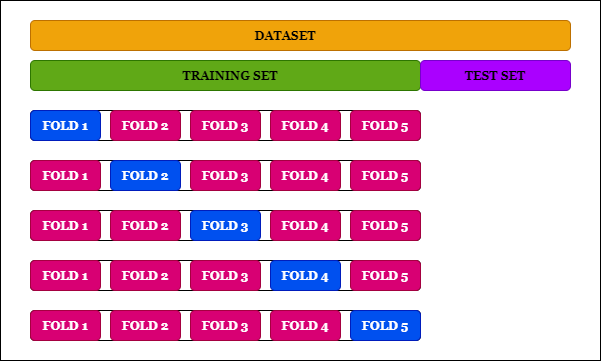

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# Load Iris dataset
iris = load_iris()
# Train logistic regression model using cross-validation
clf = LogisticRegression()
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
# Print average accuracy across folds
print(f"Accuracy: {scores.mean():.2f}")

Accuracy: 0.97


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# What Are Evaluation Metrics?

Evaluation metrics are quantitative measures used to assess the performance and effectiveness of a statistical or machine learning model. These metrics provide insights into how well the model is performing and help in comparing different models or algorithms.

# Classification Accuracy

Classification accuracy is the accuracy we generally mean, whenever we use the term accuracy. We calculate this by calculating the ratio of correct predictions to the total number of input Samples.


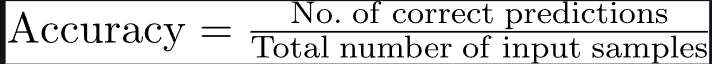

# F1 Score


It is a harmonic mean between recall and precision. Its range is [0,1]. This metric usually tells us how precise (It correctly classifies how many instances) and robust (does not miss any significant number of instances) our classifier is.

**Precision**

There is another metric named Precision. Precision is a measure of a model’s performance that tells you how many of the positive predictions made by the model are actually correct. It is calculated as the number of true positive predictions divided by the number of true positive and false positive predictions.

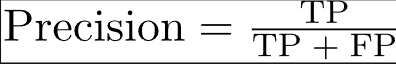

**Recall**

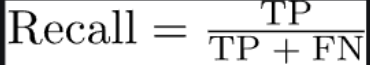


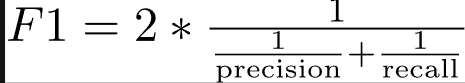


# Confusion Matrix


A confusion matrix is an N X N matrix, where N is the number of predicted classes. For the problem in hand, we have N=2, and hence we get a 2 X 2 matrix. It is a performance measurement for machine learning classification problems where the output can be two or more classes. Confusion matrix is a table with 4 different combinations of predicted and actual values. It is extremely useful for measuring precision-recall, Specificity, Accuracy, and most importantly, AUC-ROC curves.


Here are a few definitions you need to remember for a confusion matrix:


True Positive: You predicted positive, and it’s true.


True Negative: You predicted negative, and it’s true.


False Positive: (Type 1 Error): You predicted positive, and it’s false.


False Negative: (Type 2 Error): You predicted negative, and it’s false.

# Mean Absolute Error(MAE)

It is the average distance between Predicted and original values. Basically, it gives how we have predicted from the actual output. However, there is one limitation i.e. it doesn’t give any idea about the direction of the error which is whether we are under-predicting or over-predicting our data. It can be represented mathematically in this way:


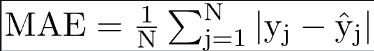

# Mean Squared Error(MSE)


It is similar to mean absolute error but the difference is it takes the square of the average of between predicted and original values. The main advantage to take this metric is here, it is easier to calculate the gradient whereas, in the case of mean absolute error, it takes complicated programming tools to calculate the gradient. By taking the square of errors it pronounces larger errors more than smaller errors, we can focus more on larger errors. It can be expressed mathematically in this way.

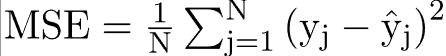

# Root Mean Square Error(RMSE)

We can say that RMSE is a metric that can be obtained by just taking the square root of the MSE value. As we know that the MSE metrics are not robust to outliers and so are the RMSE values. This gives higher weightage to the large errors in predictions.

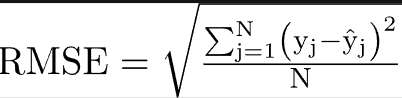

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a random forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision for each class
precision = precision_score(y_test, y_pred, average=None)
print(f'Precision for each class: {precision}')

# Calculate recall for each class
recall = recall_score(y_test, y_pred, average=None)
print(f'Recall for each class: {recall}')

# Calculate F1 score for each class
f1 = f1_score(y_test, y_pred, average=None)
print(f'F1 Score for each class: {f1}')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 1.00
Precision for each class: [1. 1. 1.]
Recall for each class: [1. 1. 1.]
F1 Score for each class: [1. 1. 1.]
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
